In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import main, toy, param, utils

In [3]:
# better graphs
sns.set_style("whitegrid")

In [4]:
# config
data_id = "adaptation_0"
estimate_id = data_id
seed = 0

In [5]:
# generate trajectory data
toy.adaptation(
    data_id, 
    n_traj=1000, 
    n_sample=100, 
    dt=10**(-4),
    m_error=0,     # Measurement error (m_error specifies the std of the white noise)
    t_error=0,      # Synchronization error (sampling starts at t = uniform_random(0, t_error))
    rand_seed=seed    # Ensure the reproducibility
)

In [6]:
# parameters
param.stationary = False
param.dim = 2
param.dt = 10**(-4)
param.n_traj = 1000
param.t_init = 0
param.t_fin = 0.01
param.x_axis = 0
param.y_axis = 1

param.n_gradient_ascent = 5000
param.which_model = "FNNKt"
param.which_rep = "Simple"
param.which_estimator = "Var"
param.n_layer = 2

In [7]:
# estimate entropy
main.estimate_entropy(data_id, estimate_id, rand_seed=seed)

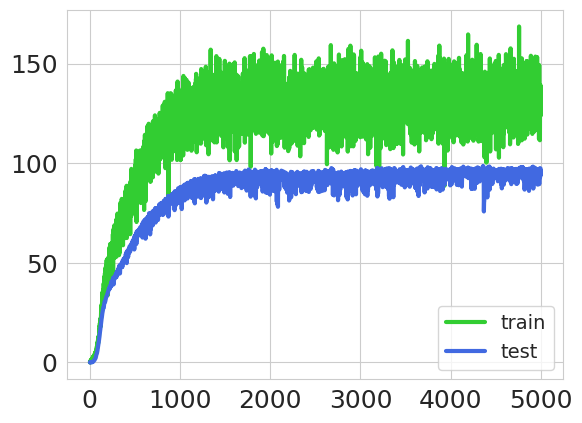

In [9]:
# plot the learning curve
utils.plot_learning_curve(
    f"Result/train{data_id}_{estimate_id}.txt",
    f"Result/test{data_id}_{estimate_id}.txt"
)

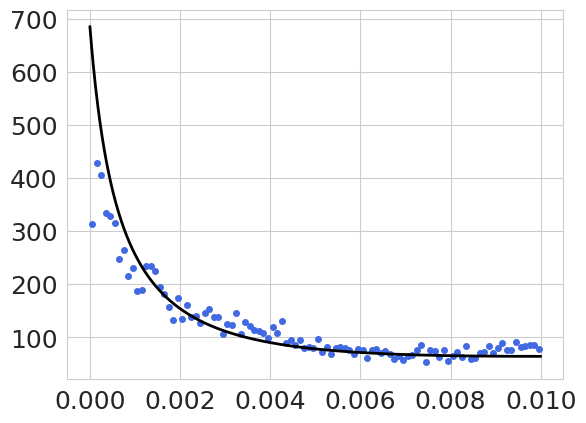

In [10]:
# plot the time-dependent entropy production rate
utils.plot_epr(
    f"Result/epr{data_id}_{estimate_id}.txt", 
    toy.epr_adaptation
)